# Analysis of contingency tables

## Libraries and settings

In [51]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Get current working directory
print(os.getcwd())

C:\Users\n-win\Desktop\ZHAW\Classes\Data Analytics\data_analytics\Week_07


## Import the apartment data

In [52]:
# Define columns
columns = ['web-scraper-order',
            'address_raw',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'rooms', 
            'area', 
            'luxurious', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";")[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'apartment_id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,apartment_id,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49,0,1441,29.41,1221.272366,24.841283,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111,0,2600,23.42,1221.272366,24.841283,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58,0,1490,25.69,1221.272366,24.841283,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118,0,3240,27.46,1221.272366,24.841283,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66,0,1450,21.97,1221.272366,24.841283,65362.04268,974.844209


## Create a new categorical variable based on the price_per_m2

### Plot histogram of price_per_m2

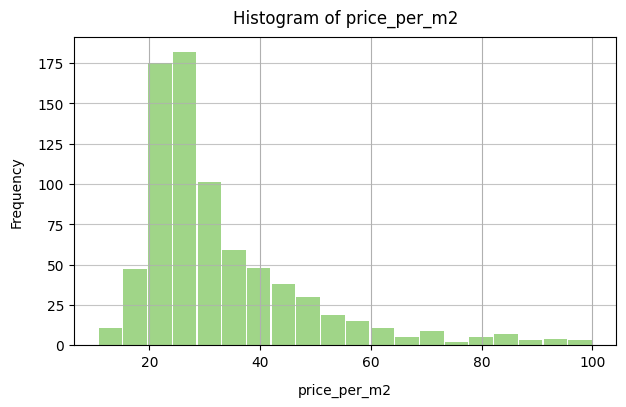

In [53]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of price_per_m2

In [54]:
qt_price = df['price_per_m2'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_price

0.10    20.4
0.25    23.4
0.50    28.0
0.75    38.0
0.90    51.6
Name: price_per_m2, dtype: float64

### Create new categorical variable 'price_cat'

In [55]:
# Create labels
labels = ['0 - 19', '20 - 24', '25 - 29', '30 - 34', '>= 35']

# Create new categorical variable
df["price_cat"] = pd.cut(df.price_per_m2, bins=[0, 20, 25, 30, 35, 150], labels=labels)

# Check values
df[['price_per_m2', 'price_cat']].head(10)

,price_per_m2,price_cat
0,29.41,25 - 29
1,23.42,20 - 24
2,25.69,25 - 29
3,27.46,25 - 29
4,21.97,20 - 24
5,21.43,20 - 24
6,28.46,25 - 29
7,23.96,20 - 24
8,30.29,30 - 34
9,17.80,0 - 19


## Create a new categorical variable based on the living area

### Plot histogram of area

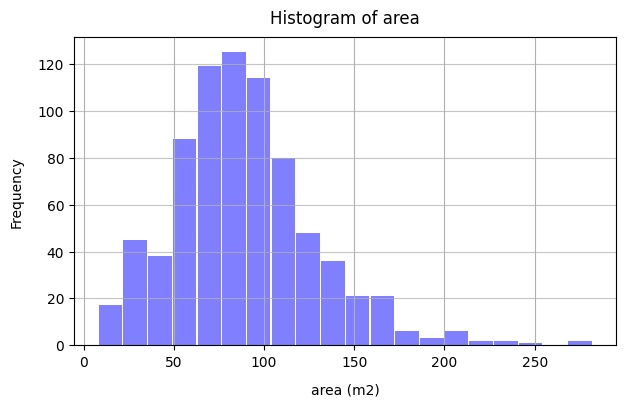

In [56]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['area'], 
                            bins=20, 
                            color='blue',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area (m2)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of area

In [57]:
qt_area = df['area'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_area

0.10     43.0
0.25     63.2
0.50     86.0
0.75    108.0
0.90    140.0
Name: area, dtype: float64

### Create new categorical variable 'area_cat'

In [58]:
# Create labels
labels = ['0 - 49', '50 - 74', '75 - 99', '100 - 149', '>= 150']

# Create new categorical variable
df["area_cat"] = pd.cut(df['area'], bins=[0, 50, 75, 100, 150, 1000], labels=labels)

# Check values
df[['area', 'area_cat']].head(10)

,area,area_cat
0,49,0 - 49
1,111,100 - 149
2,58,50 - 74
3,118,100 - 149
4,66,50 - 74
5,61,50 - 74
6,65,50 - 74
7,101,100 - 149
8,68,50 - 74
9,191,>= 150


## Create a contingency table with the number of apartments per 'area_cat' versus 'price_cat'

In [59]:
# Contingency table (numbers in the table are apartments)
tab = pd.pivot_table(df[['apartment_id', 'area_cat', 'price_cat']],
                     index=['area_cat'],
                     columns=['price_cat'], 
                     aggfunc='count')
tab

apartment_id                              
price_cat       0 - 19 20 - 24 25 - 29 30 - 34 >= 35
area_cat                                            
0 - 49               2       2       4      13    84
50 - 74              1      40      58      31    64
75 - 99             19      73      66      21    48
100 - 149           31      80      47      22    21
>= 150              20       8       6       5     8

## Perform a Chi-square test on the contingency table
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [60]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[ 9.9031 27.5388 24.5543 12.4806 30.5233]
 [18.2972 50.8811 45.3669 23.0594 56.3953]
 [21.4096 59.5362 53.084  26.9819 65.9884]
 [18.9574 52.7171 47.0039 23.8915 58.4302]
 [ 4.4328 12.3269 10.991   5.5866 13.6628]] 

Critical value: 26.2962 

Test statistic: 286.3147 

Degrees of freedom: 16 

p-value: 0.0000


## Interpretation of the Chi-squared test result

<p>Because the test statistic is larger than the critical value and the p-value is smaller than our significance level apha=0.05, we can reject the null hypothesis, i.e. there is a statistically significant (at the 0.05 significance-level) association between the price-categories and the living-area categories in the contingence table.</p>

## Applying the Chi-squared test to animal behavior

For full study see: https://davida-rosenstrauch.medium.com/applying-the-chi-squared-test-to-animal-behavior-b6cca3f930b8

<img src="https://miro.medium.com/max/640/1*h5JgsNbUy2tuiLgSrkIlyA.png" width="500" align="left"/>

### Contingency table, spotted hyena example

In [61]:
# The numpy array shows how many times each hyena responded (see study above)
table = np.array([[0,4],
                  [7,6],
                  [9,0],
                  [15,10]])

# Create a data frame from 'table'
df_hy = pd.DataFrame(table, columns=[['Female', 'Male']],
             index=['Fear', 'Greeting', 'Aggression', 'No Response'])
df_hy

,Female,Male
Fear,0,4
Greeting,7,6
Aggression,9,0
No Response,15,10


### Manual Calculation of the Chi-squared test

In [62]:
row_sums = table.sum(axis=1)
col_sums = table.sum(axis=0)
total = table.sum()

expected_manual = np.zeros_like(table, dtype=float)

for i in range(table.shape[0]):
    for j in range(table.shape[1]):
        expected_manual[i, j] = row_sums[i] * col_sums[j] / total

expected_manual = expected_manual.round(4)

chi_manual = np.sum( ( (table - expected_manual)**2 ) / expected_manual )
print(f"Chi Manual: {chi_manual:.4f}")

dof = (table.shape[0] - 1) * (table.shape[1] - 1)
print(f"Degrees of Freedom: {dof}")

p_manual = 1 - chi2.cdf(chi_manual, dof)
print(f"p-value Manual: {p_manual:.4f}")

Chi Manual: 12.2756
Degrees of Freedom: 3
p-value Manual: 0.0065


The Chi-square test of independence shows a significant deviation between the observed and expected frequencies (χ² = 12.2756, df = 3, p = 0.0065). This means that the behavioural responses of spotted hyenas are not independent of sex. The differences observed between males and females are larger than what would be expected by random variation alone. Thus, there is a statistically significant association between sex and behavioural reaction.

In [63]:
# Using scipy.stats.chi2_contingency
stat_scipy, p_scipy, df_scipy, expected_scipy = chi2_contingency(table)

print("Manual chi^2:", chi_manual)
print("SciPy chi^2: ", stat_scipy)
print()
print("Manual p-value:", p_manual)
print("SciPy p-value: ", p_scipy)
print()
print("Expected manual:\n", expected_manual)
print("Expected SciPy:\n", expected_scipy.round(4))

Manual chi^2: 12.275605874948084
SciPy chi^2:  12.27543424317618

Manual p-value: 0.006496284731579038
SciPy p-value:  0.006496802854004816

Expected manual:
 [[ 2.4314  1.5686]
 [ 7.902   5.098 ]
 [ 5.4706  3.5294]
 [15.1961  9.8039]]
Expected SciPy:
 [[ 2.4314  1.5686]
 [ 7.902   5.098 ]
 [ 5.4706  3.5294]
 [15.1961  9.8039]]


The manually computed Chi-square statistic (χ² = 12.2756) is almost identical to the value returned by SciPy (χ² = 12.2754). The same applies to the p-values: the manual p-value (0.006496) and the SciPy p-value (0.006497) differ only by rounding error. In addition, the expected frequencies calculated manually match exactly the expected frequencies obtained from chi2_contingency.

This confirms that the manual implementation of the Chi-square test is correct.

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [64]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2025-11-30 17:21:32
Python Version: 3.10.5
-----------------------------------
